# SetUP

In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd

#print(np.__version__) #print numpy version, e.g., 1.21.5
#to upgrade: pip install --upgrade numpy

import os

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [2]:
#Importare date

# data = pd.read_csv("MergeConflictsDataset2.csv", header = 0)
# data_with_columns = pd.read_csv("MergeConflictsDataset2.csv", header = 0)
data = pd.read_csv("MergeConflictsDataset.csv", sep = ';', header = 0)
data_with_columns = pd.read_csv("MergeConflictsDataset.csv", sep = ';', header = 0)

data.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


# Process Data

In [3]:
#Encodare date utilizand OrdinalEncoder
#se transforma datele de tip string in valori numerice care pot fi procesate mai usor

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["commit"] = ord_enc.fit_transform(data[["commit"]])
data["parent1"] = ord_enc.fit_transform(data[["parent1"]])
data["parent2"] = ord_enc.fit_transform(data[["parent2"]])
data["ancestor"] = ord_enc.fit_transform(data[["ancestor"]])

data_with_columns["commit"] = ord_enc.fit_transform(data[["commit"]])
data_with_columns["parent1"] = ord_enc.fit_transform(data[["parent1"]])
data_with_columns["parent2"] = ord_enc.fit_transform(data[["parent2"]])
data_with_columns["ancestor"] = ord_enc.fit_transform(data[["ancestor"]])

data.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,25206.0,25994.0,9899.0,18212.0,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,4283.0,11968.0,26283.0,11668.0,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,24358.0,5698.0,19606.0,3951.0,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,1270.0,6896.0,14036.0,18400.0,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,7008.0,12515.0,9845.0,2600.0,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [4]:
ord_enc.categories_

[array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.8552e+04, 1.8553e+04,
               nan])]

In [5]:
#Scalare date
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_scaled = ss.fit_transform(data)

data_scaled_dt = pd.DataFrame(data_scaled,
                              columns = data.columns)
data_scaled_dt.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,1.505300,1.668763,-0.448732,1.658476,0.534580,-0.047322,-0.024363,-0.380711,-0.139543,-0.239677,...,-0.333966,-0.298271,-0.31358,-0.177672,-0.167046,-0.908326,-0.443309,-0.850178,-1.219285,-0.239911
1,-1.181954,-0.166075,1.675306,0.434223,-1.870628,0.083310,1.071759,-0.298946,0.013498,0.143429,...,-0.333966,-0.298271,-0.31358,-0.177672,-0.167046,-0.590034,0.137896,-0.271907,-0.368699,4.168210
2,1.396387,-0.986297,0.809693,-1.009475,0.534580,-0.047884,-0.024363,-0.380711,-0.139543,-0.240778,...,-0.333966,-0.298271,-0.31358,-0.177672,-0.167046,-0.966198,-0.968628,-1.284558,-1.270066,-0.239911
3,-1.568930,-0.829578,0.087593,1.693647,0.534580,-0.047884,-0.024363,-0.217181,-0.139543,-0.238576,...,-0.333966,-0.298271,-0.31358,-0.177672,-0.167046,-0.850455,-0.465663,-0.765299,-0.939988,-0.239911
4,-0.831967,-0.094518,-0.455733,-1.262220,-1.870628,-0.047884,-0.024363,-0.298946,0.013498,-0.262795,...,-0.333966,-0.298271,-0.31358,-0.177672,-0.167046,-0.590034,-0.543902,-0.647967,-0.622606,4.168210


In [6]:
#Normalizare date
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
data_scaled_mms = mms.fit_transform(data)

data_scaled_dt_mms = pd.DataFrame(data_scaled_mms,
                              columns = data.columns)
data_scaled_dt_mms.head()


,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,0.934594,0.982129,0.370458,0.981620,1.0,0.000004,0.000000,0.000000,0.005495,0.001069,...,0.0,0.0,0.0,0.0,0.0,0.015083,0.049020,0.026697,0.015083,0.0
1,0.158806,0.452186,0.983608,0.628901,0.0,0.001022,0.009879,0.006329,0.010989,0.017245,...,0.0,0.0,0.0,0.0,0.0,0.023379,0.088235,0.044166,0.040347,1.0
2,0.903152,0.215287,0.733730,0.212957,1.0,0.000000,0.000000,0.000000,0.005495,0.001023,...,0.0,0.0,0.0,0.0,0.0,0.013575,0.013575,0.013575,0.013575,0.0
3,0.047089,0.260551,0.525280,0.991753,1.0,0.000000,0.000000,0.012658,0.005495,0.001116,...,0.0,0.0,0.0,0.0,0.0,0.016591,0.047511,0.029261,0.023379,0.0
4,0.259844,0.472853,0.368437,0.140139,0.0,0.000000,0.000000,0.006329,0.010989,0.000093,...,0.0,0.0,0.0,0.0,0.0,0.023379,0.042232,0.032805,0.032805,1.0


In [7]:
#Inspectare date
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26973 entries, 0 to 26972
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26973 non-null  float64
 1   parent1          26973 non-null  float64
 2   parent2          26973 non-null  float64
 3   ancestor         26972 non-null  float64
 4   is pr            26973 non-null  int64  
 5   added lines      26973 non-null  int64  
 6   deleted lines    26973 non-null  int64  
 7   devs parent1     26973 non-null  int64  
 8   devs parent2     26973 non-null  int64  
 9   time             26973 non-null  int64  
 10  nr files         26973 non-null  int64  
 11  added files      26973 non-null  int64  
 12  deleted files    26973 non-null  int64  
 13  renamed files    26973 non-null  int64  
 14  copied files     26973 non-null  int64  
 15  modified files   26973 non-null  int64  
 16  nr commits1      26973 non-null  int64  
 17  nr commits2 

In [8]:
data.columns

Index(['commit', 'parent1', 'parent2', 'ancestor', 'is pr', 'added lines',
       'deleted lines', 'devs parent1', 'devs parent2', 'time', 'nr files',
       'added files', 'deleted files', 'renamed files', 'copied files',
       'modified files', 'nr commits1', 'nr commits2', 'density1', 'density2',
       'fix', 'bug', 'feature', 'improve', 'document', 'refactor', 'update',
       'add', 'remove', 'use', 'delete', 'change', 'messages_min',
       'messages_max', 'messages_mean', 'messages_median', 'conflict'],
      dtype='object')

In [9]:
#Am realizat shape pt a vedea numarul total de date (primul parametru e nr de linii, al doilea nr de coloane)
data.shape

(26973, 37)

In [10]:
data.dtypes

commit             float64
parent1            float64
parent2            float64
ancestor           float64
is pr                int64
added lines          int64
deleted lines        int64
devs parent1         int64
devs parent2         int64
time                 int64
nr files             int64
added files          int64
deleted files        int64
renamed files        int64
copied files         int64
modified files       int64
nr commits1          int64
nr commits2          int64
density1             int64
density2             int64
fix                  int64
bug                  int64
feature              int64
improve              int64
document             int64
refactor             int64
update               int64
add                  int64
remove               int64
use                  int64
delete               int64
change               int64
messages_min         int64
messages_max         int64
messages_mean      float64
messages_median    float64
conflict             int64
d

In [11]:
data["conflict"].value_counts()

0    25505
1     1468
Name: conflict, dtype: int64

In [12]:
data.describe()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26973.000000,26973.000000,26973.000000,26972.000000,26973.000000,2.697300e+04,2.697300e+04,26973.000000,26973.000000,26973.000000,...,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000
mean,13485.709079,13237.521225,13360.342824,9346.945573,0.777741,4.255746e+02,2.504278e+02,4.656175,1.911801,240.714159,...,4.316205,0.955437,1.338857,0.096281,1.007860,51.391280,104.662551,69.455646,68.021095,0.054425
std,7786.159541,7644.415239,7713.752413,5345.400314,0.415772,8.887706e+03,1.027916e+04,12.230444,6.534316,908.382038,...,12.924317,3.203307,4.269666,0.541916,6.033535,34.560112,89.471017,40.057823,39.385369,0.226858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6743.000000,6612.000000,6678.000000,4736.750000,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,13486.000000,13240.000000,13365.000000,9421.500000,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.391304,65.000000,0.000000
75%,20229.000000,19864.000000,20029.000000,13953.250000,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.714286,90.000000,0.000000
max,26970.000000,26467.000000,26721.000000,18553.000000,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


Saving figure attribute_histogram_plots


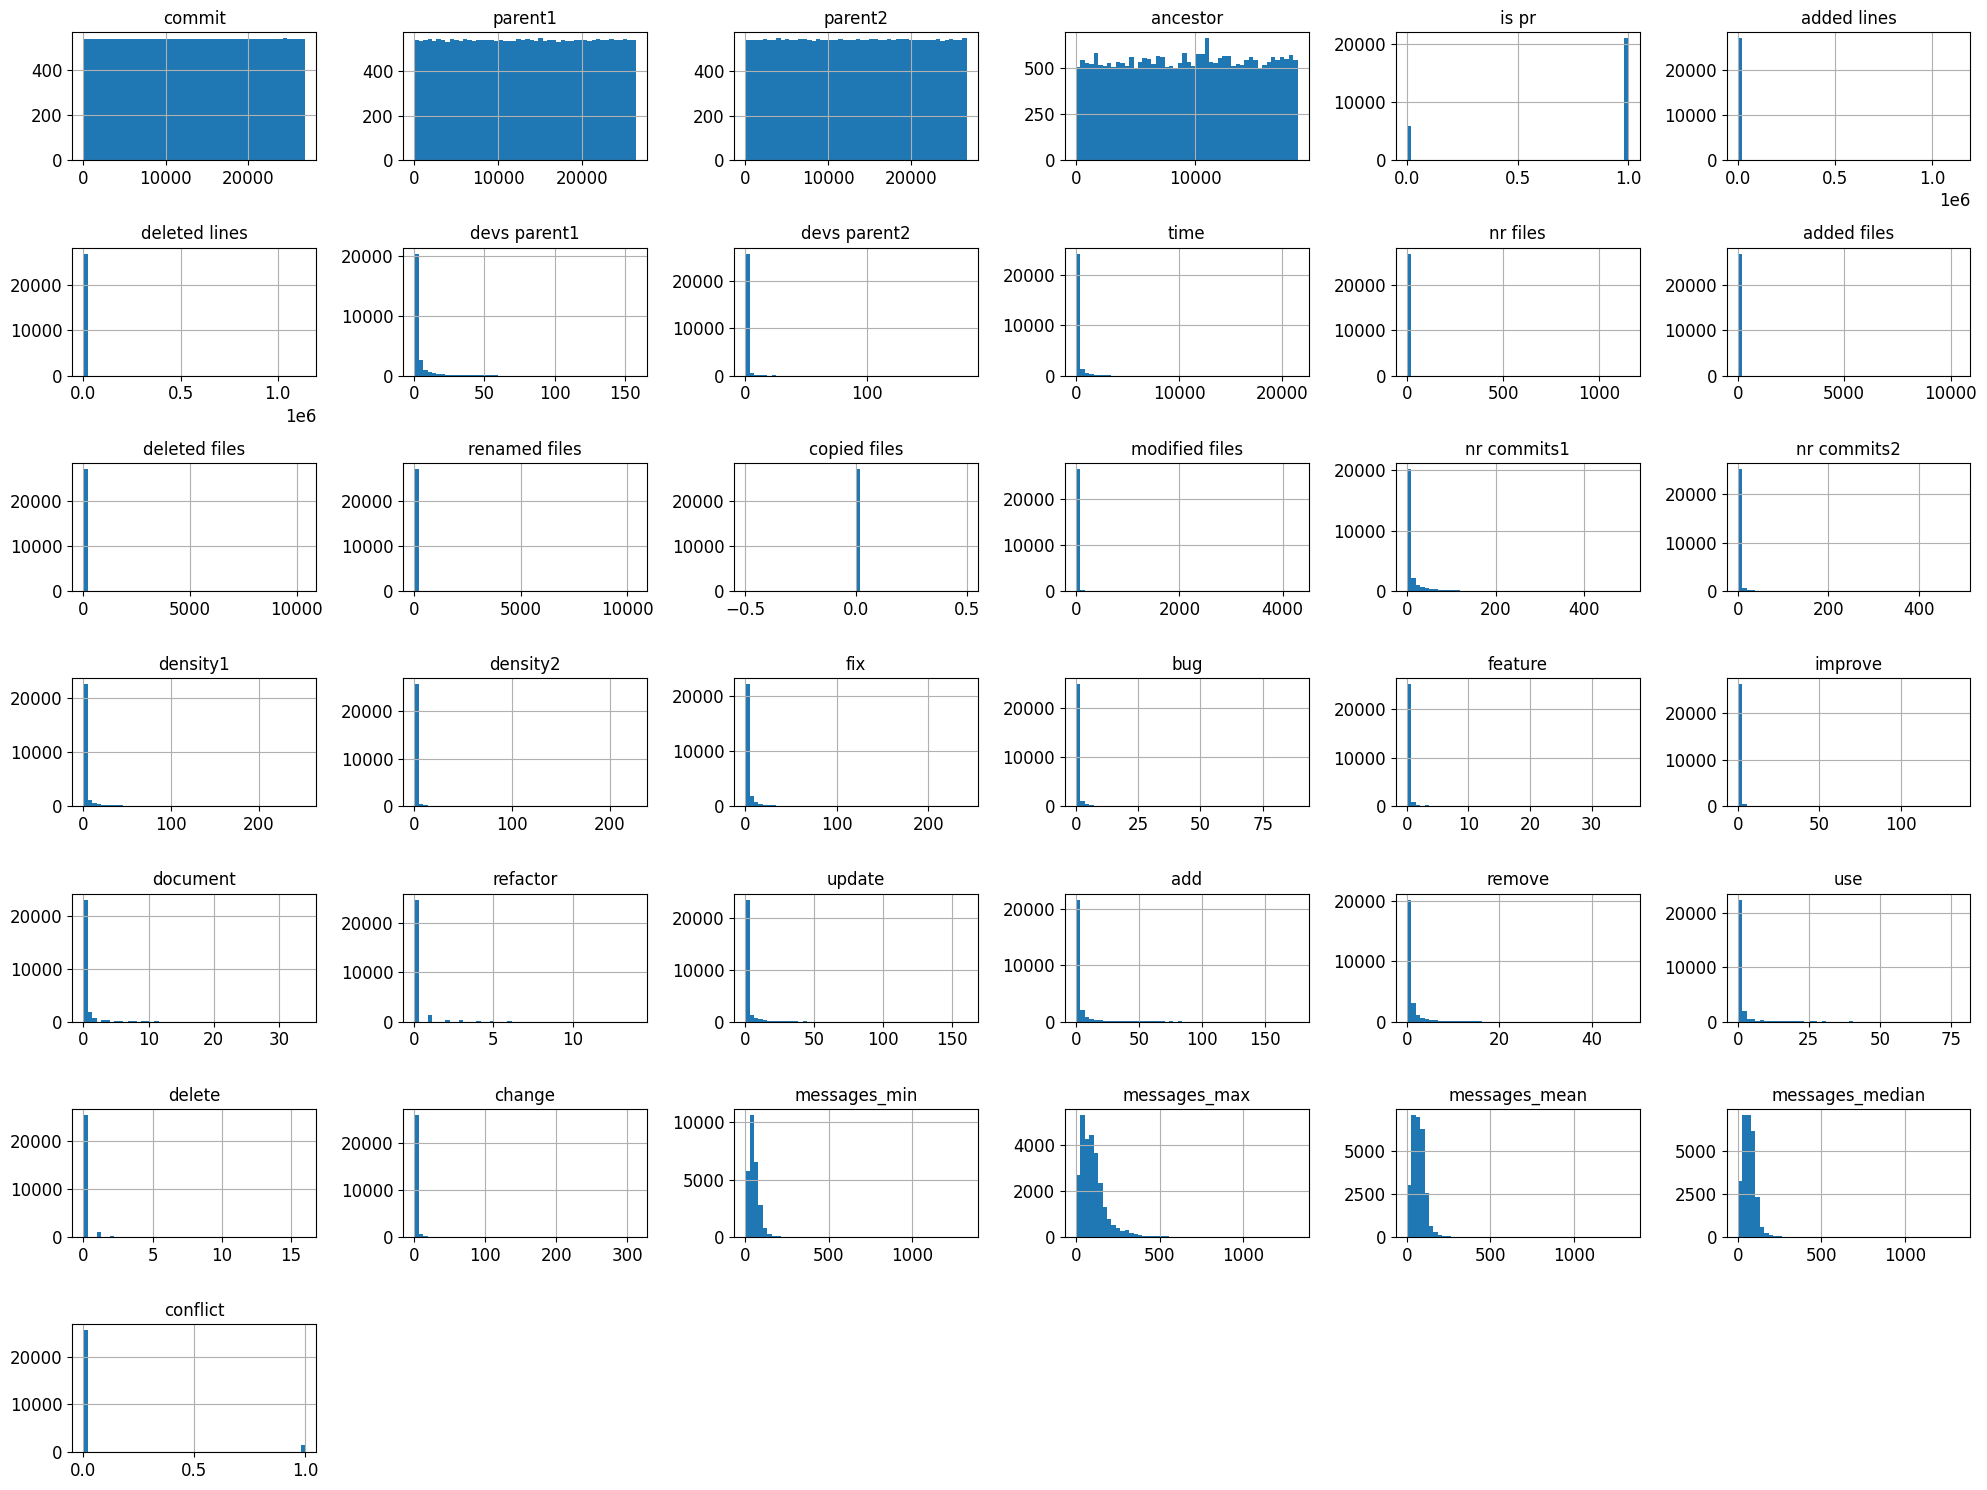

In [13]:
#Vizualizarea datelor

%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [14]:
#Eliminare coloane redundante
data.drop(columns=["commit", "parent1", "parent2", "ancestor"], inplace=True)
data.head()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,1,5,0,0,1,23,0,0,0,0,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,0,1166,11267,1,2,371,3,7,199,2,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,1,0,0,0,1,22,0,0,0,0,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,1,0,0,2,1,24,1,0,0,0,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,0,0,0,1,2,2,1,0,0,0,...,0,0,0,0,0,31,56,43.50000,43.5,1


Saving figure attribute_histogram_plots2


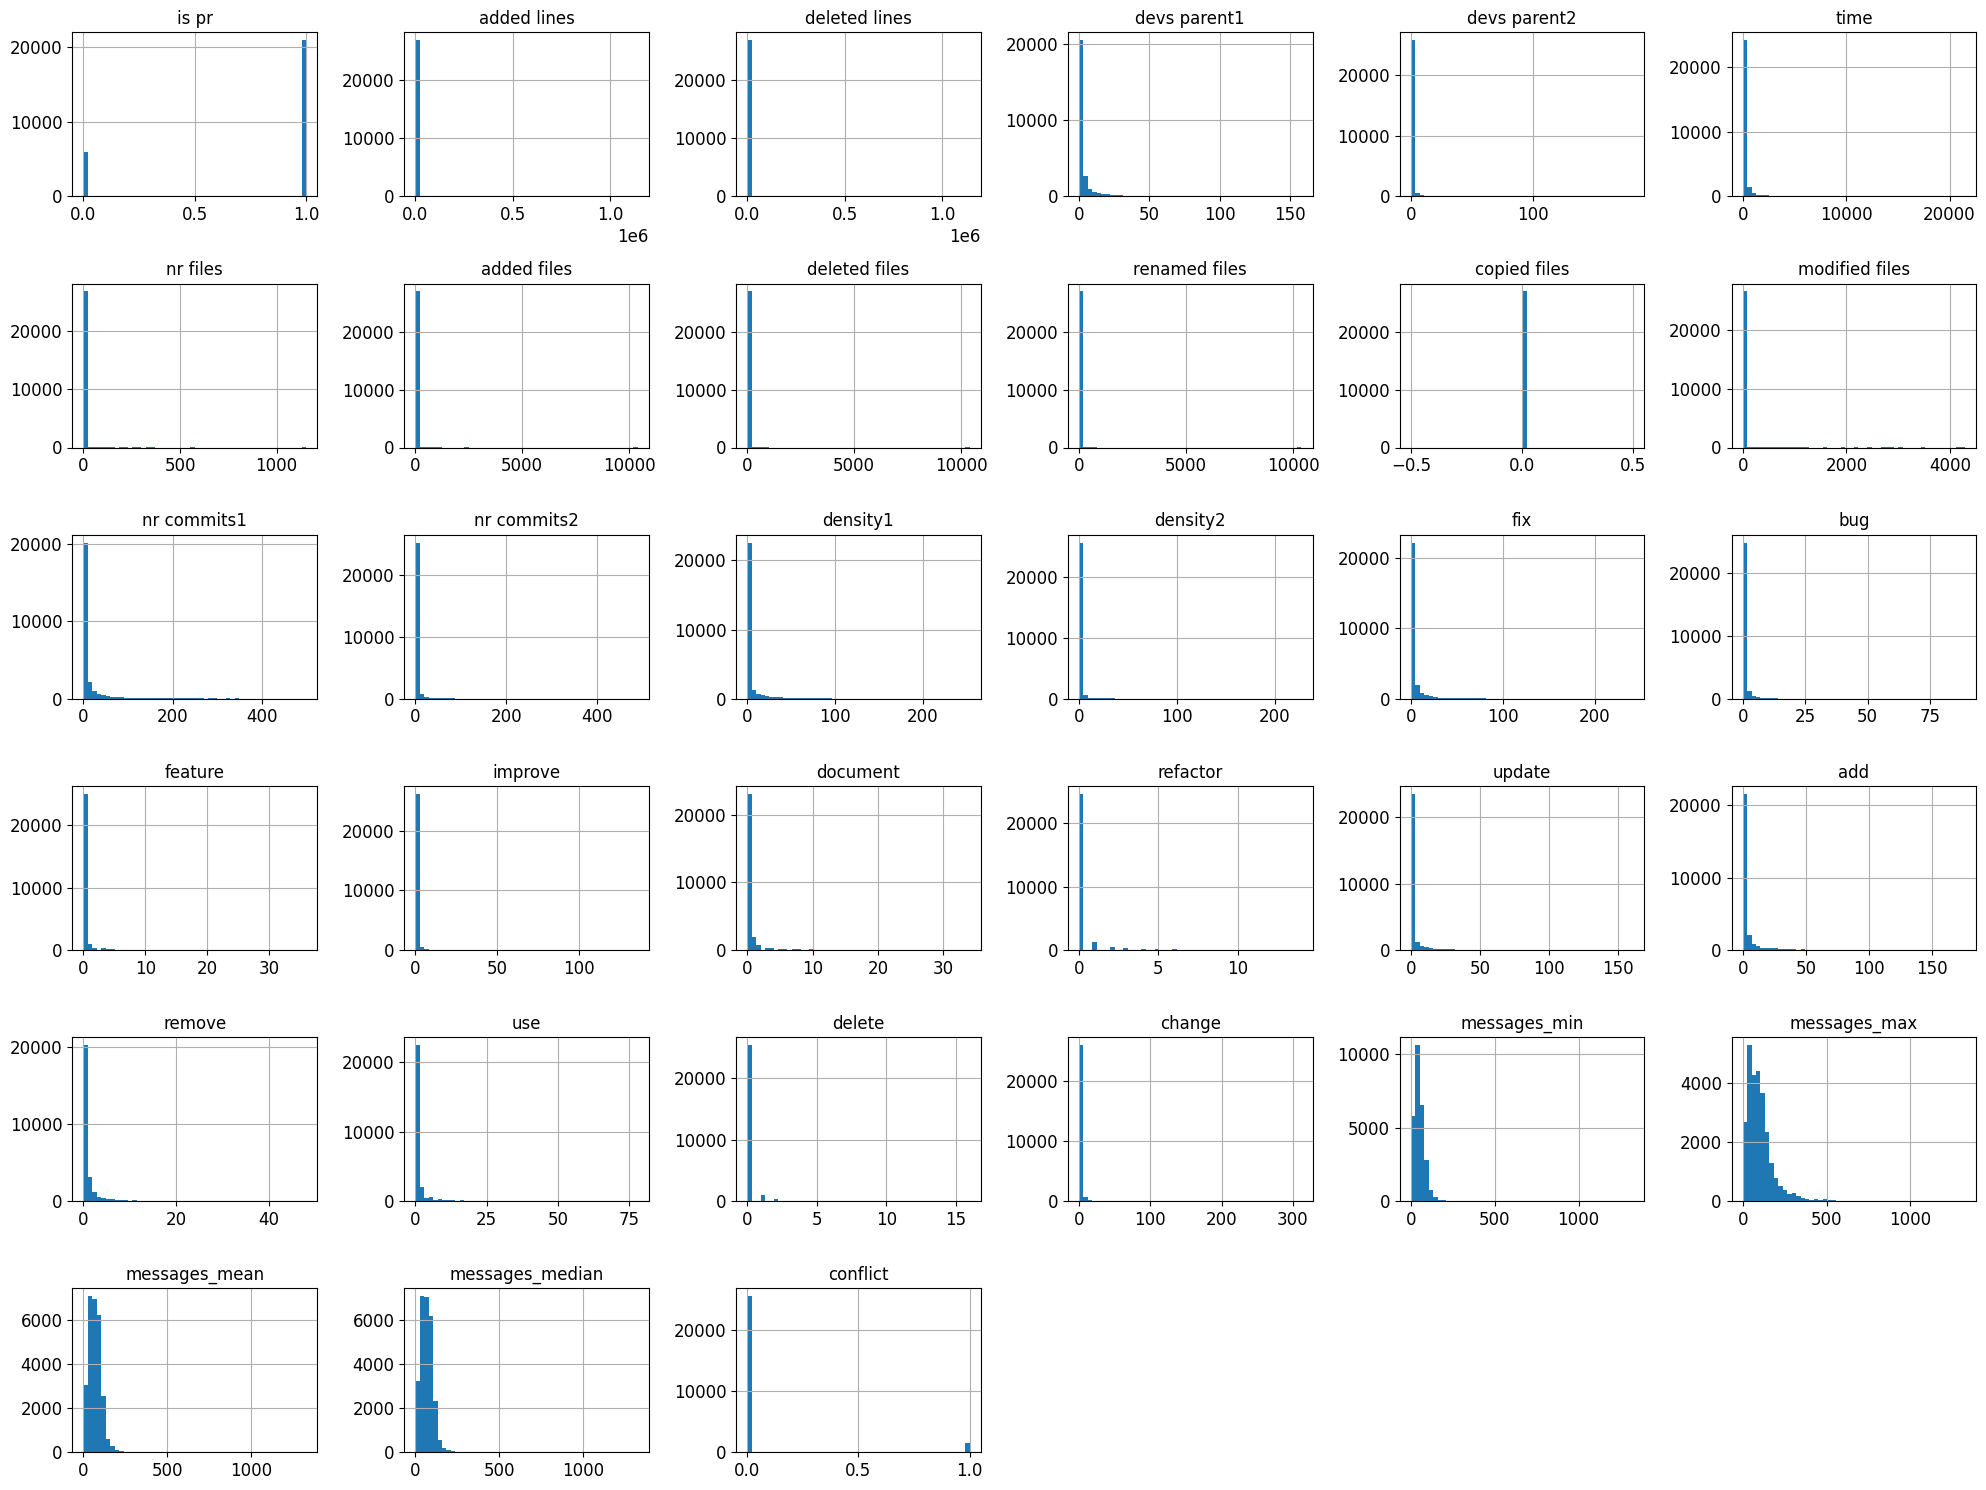

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots2")
plt.show()

<AxesSubplot:>

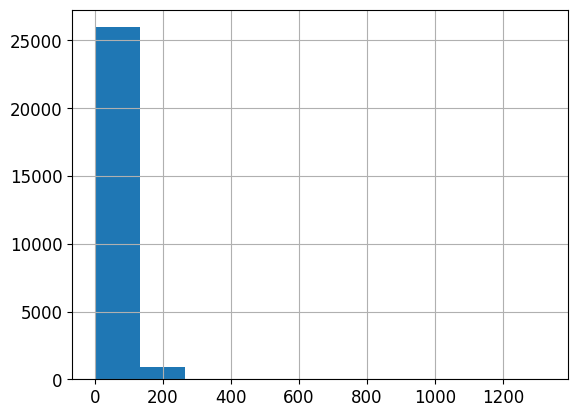

In [16]:
data["messages_median"].hist()

<AxesSubplot:>

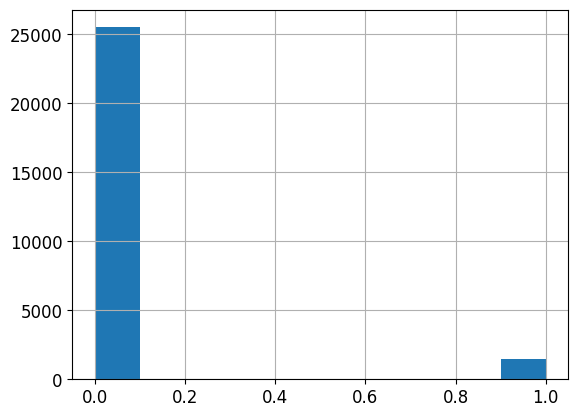

In [17]:
data["conflict"].hist()

In [18]:
#Preprocesare date -- eliminare duplicate
data = data.drop_duplicates()

In [19]:
data["conflict"].value_counts()

0    25049
1     1457
Name: conflict, dtype: int64

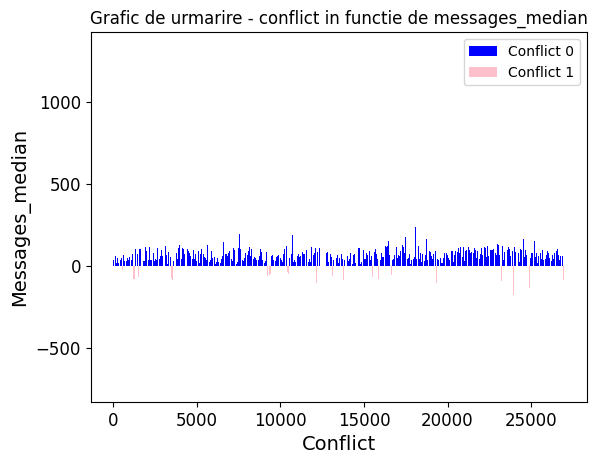

In [20]:
#Datele sunt inconsistente pentru ca sunt putine valori negative (spike-uri negative)
conflict_0 = data[data["conflict"] == 0]
conflict_1 = data[data["conflict"] == 1]

index_0 = conflict_0.index
index_1 = conflict_1.index

messages_median_0 = conflict_0["messages_median"]
messages_median_1 = conflict_1["messages_median"]


plt.bar(index_0, messages_median_0, color="blue", label="Conflict 0", width = 0.8)
plt.bar(index_1, -messages_median_1, color="pink", label="Conflict 1", width = 0.8)

plt.xlabel("Conflict")
plt.ylabel("Messages_median")
plt.title("Grafic de urmarire - conflict in functie de messages_median")

plt.legend()
plt.show()

In [21]:
#Matricea de corelare
corr_matrix = data.corr()

In [22]:
corr_matrix["messages_median"].sort_values(ascending=False)

messages_median    1.000000
messages_mean      0.989422
messages_min       0.879874
messages_max       0.655548
density1           0.221920
use                0.211183
fix                0.197585
devs parent1       0.190898
document           0.174572
nr commits1        0.171771
add                0.131479
bug                0.129937
remove             0.121677
refactor           0.090871
feature            0.075332
change             0.072003
update             0.070722
delete             0.057534
improve            0.044195
conflict           0.019549
time               0.016790
density2           0.013896
nr commits2        0.001907
nr files          -0.000015
modified files    -0.004841
deleted files     -0.006574
devs parent2      -0.007495
deleted lines     -0.009130
renamed files     -0.010123
added files       -0.014561
added lines       -0.015773
is pr             -0.066645
copied files            NaN
Name: messages_median, dtype: float64

In [23]:
corr_matrix["conflict"].sort_values(ascending=False)

conflict           1.000000
nr commits2        0.303998
devs parent2       0.275168
add                0.236198
density2           0.219250
remove             0.203217
nr files           0.172138
fix                0.165308
update             0.158234
messages_max       0.154473
refactor           0.144908
time               0.135988
change             0.130892
use                0.129423
nr commits1        0.121084
feature            0.119416
bug                0.107856
document           0.097199
modified files     0.089762
devs parent1       0.073713
improve            0.066409
delete             0.061461
added lines        0.040196
deleted lines      0.036906
messages_mean      0.034776
renamed files      0.031906
deleted files      0.023836
density1           0.022989
messages_median    0.019549
added files        0.019280
messages_min      -0.082843
is pr             -0.438539
copied files            NaN
Name: conflict, dtype: float64

Saving figure scatter_matrix_plot


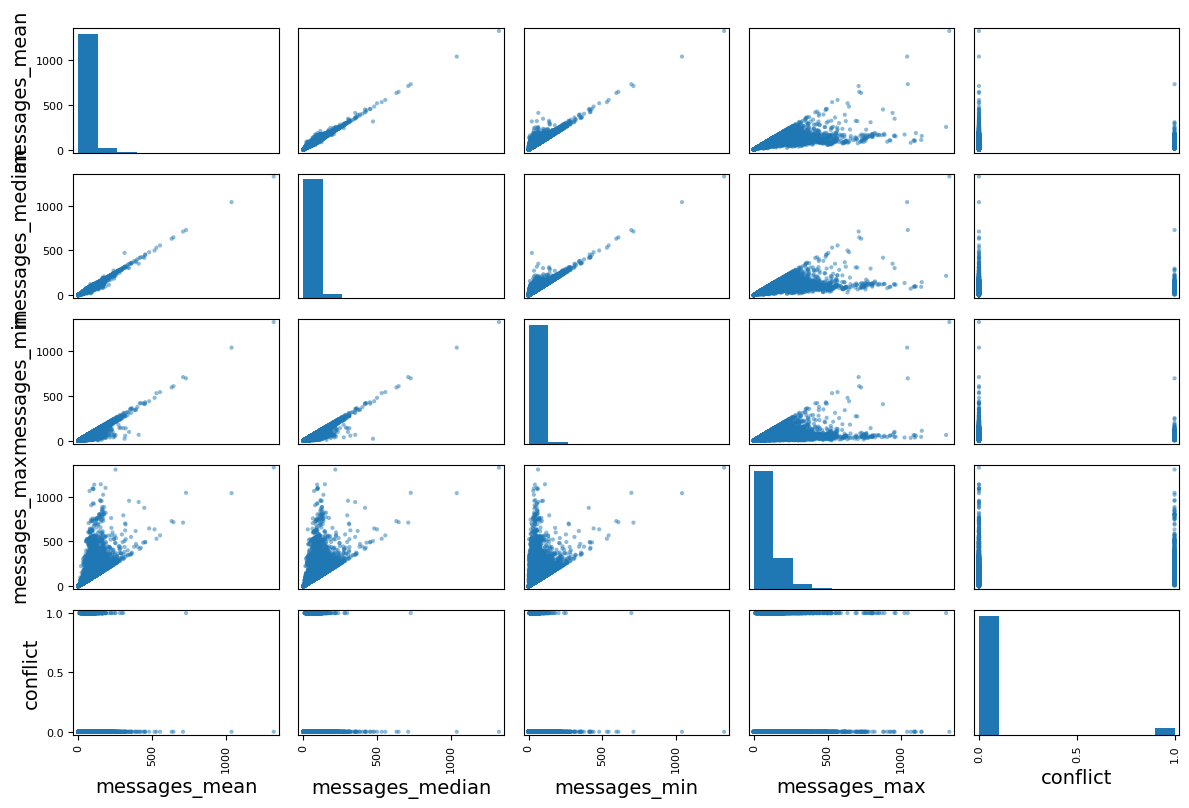

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["messages_mean", "messages_median", "messages_min", "messages_max", "conflict"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

# Split

In [25]:
#Facem split pe linii si coloane pentru metrics-uri  --> split dupa coloana conflict
# 25% din valori sunt folosite pentru test, 75% pentru training
from sklearn.model_selection import train_test_split

#date fara primele 4 coloane
y = data["conflict"]
X = data[data.columns.drop('conflict')]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#date cu primale 4 coloane
y_with_columns = data_with_columns["conflict"]
X_with_columns = data_with_columns[data_with_columns.columns.drop('conflict')]

X_with_columns_train, X_with_columns_test, y_with_columns_train, y_with_columns_test = train_test_split(X_with_columns, y_with_columns, test_size=0.25, random_state=42)

In [26]:
X_train

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median
14645,1,2,1,0,1,34,0,0,0,0,...,0,0,0,0,0,0,31,31,31.000000,31.0
19776,1,1,1,3,1,160,0,0,0,1,...,2,1,0,0,0,0,31,73,58.000000,64.0
24613,1,25,6,3,1,8,0,0,0,0,...,0,1,0,1,0,0,57,87,77.666667,80.5
14465,1,1,1,95,1,1238,1,0,0,0,...,18,164,3,2,0,3,28,135,59.792135,64.0
21742,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,52,52,52.000000,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21992,0,35,1,1,2,0,0,0,0,0,...,0,1,0,0,0,0,92,144,118.000000,118.0
5440,1,8,1,0,1,60,0,0,0,0,...,0,1,0,0,0,0,49,49,49.000000,49.0
876,1,1,1,0,1,34,0,0,0,0,...,0,0,0,0,0,0,7,44,25.500000,25.5
16163,1,28,20,0,1,4,0,0,0,0,...,0,0,0,0,0,0,52,52,52.000000,52.0


In [27]:
X_with_columns_train

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median
18967,11390.0,8703.0,19064.0,6032.0,1,2,1,0,1,51,...,1,0,0,0,0,0,51,51,51.000000,51.0
3202,12295.0,12234.0,21036.0,50.0,0,272,13,6,1,172,...,2,16,3,2,1,2,42,136,85.232143,85.0
22141,19836.0,24427.0,25788.0,4515.0,1,33,15,10,1,69,...,2,5,1,3,0,0,69,172,114.600000,108.0
26334,16700.0,832.0,26247.0,2658.0,1,20,3,5,1,103,...,2,2,0,0,0,2,165,282,218.555556,217.0
12181,11913.0,13150.0,5209.0,10733.0,1,6,0,3,1,7,...,1,0,0,0,0,0,124,171,148.000000,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,26896.0,6452.0,1966.0,15441.0,1,10,0,1,1,4,...,1,1,0,0,0,1,111,128,119.666667,120.0
5390,10466.0,7513.0,17572.0,15976.0,1,186,132,2,1,96,...,0,0,0,1,0,1,94,99,96.500000,96.5
860,22483.0,10306.0,16761.0,9919.0,1,15,15,2,1,107,...,4,0,0,0,0,0,36,69,46.800000,43.0
15795,19236.0,7419.0,8316.0,17378.0,1,82,0,6,1,212,...,1,2,1,6,0,1,23,78,49.708333,51.0


In [28]:
y_train

14645    0
19776    0
24613    0
14465    0
21742    0
        ..
21992    0
5440     0
876      0
16163    0
24086    0
Name: conflict, Length: 19879, dtype: int64

In [29]:
y_with_columns_train

18967    0
3202     0
22141    0
26334    0
12181    0
        ..
21575    0
5390     0
860      0
15795    0
23654    0
Name: conflict, Length: 20229, dtype: int64

In [30]:
#Scalam datele pentru uniformizare - datele de test si de training
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_with_columns_train = scaler.fit_transform(X_with_columns_train)
X_with_columns_test = scaler.transform(X_with_columns_test)

# RANDOM FOREST CLASSIFIER

In [31]:
#Pentru acest clasificator s-au optinut valori mai bune 
#pentru f1_score si acuracy_score pentru setul de date fara primele 4 coloane ramase

#Set de date fara - f1_score = 67,38%, accuracy = 96,8%
#Set de date cu - f1_score = 64,74% , accuracy = 96,55%

In [32]:
#Antrenam modelul cu datele fara primele 4 coloane

#OBS: daca la partea de training ii oferim 90% din date, clasificatorului ii scade F1_score pana la aproximativ 63%

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

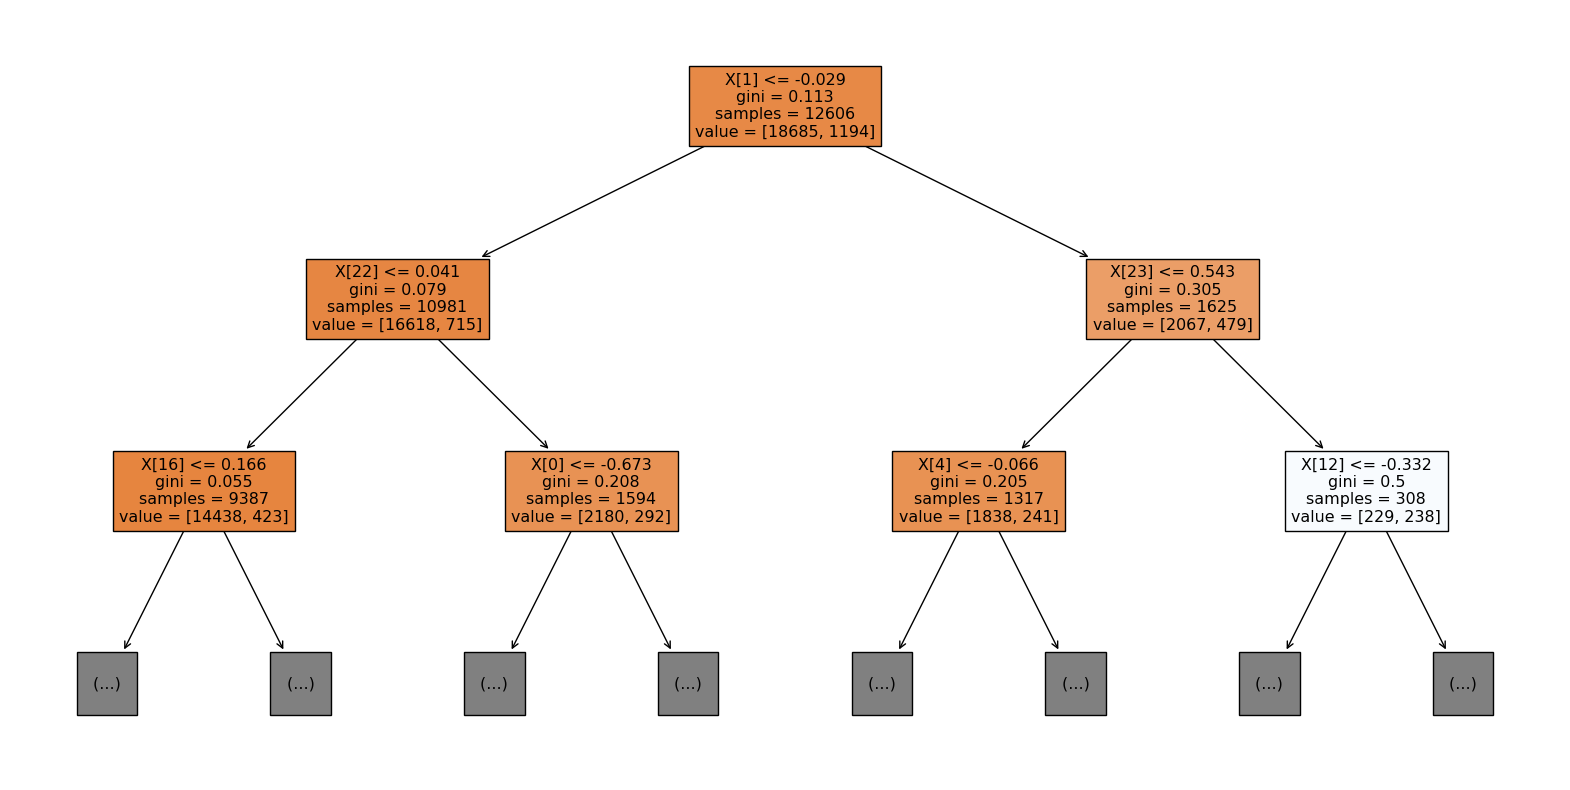

In [33]:
#Generam un DecisionTree -- se foloseste pentru a vedea ramificatile in decizii
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(rfc.estimators_[0], max_depth = 2, filled=True)
plt.savefig('random_forest.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

# Metrics - cu datele fara primele 4 coloane

In [34]:
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve

y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

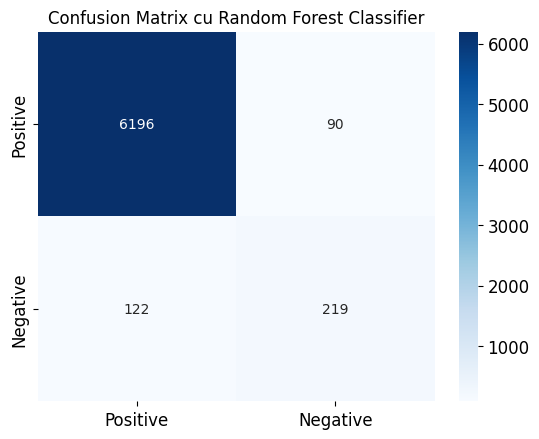

In [35]:
#Confusion_matrix 
import seaborn as sns

cm_rfc = confusion_matrix(y_test, y_pred)

labels = ['Positive', 'Negative']
sns.heatmap(cm_rfc, annot=True,  fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix cu Random Forest Classifier")
plt.show()

In [36]:
#Acuratete
#Accuracy = (TP + TN) / (TP + TN + FP + FN)

accuracy_score(y_test, y_pred)

0.9680096574618983

In [37]:
#Precizie
#Precision = TP / (TP + FP)

precision_score(y_test, y_pred)

0.7087378640776699

In [38]:
#Sensibilitate
#Recall = TP / (TP + FN)

recall_score(y_test, y_pred)

0.6422287390029325

In [39]:
#F1_score = 2 * Precision * Recall/(Precision +  Recall)
f1_score_RFC = f1_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.6738461538461539

In [40]:
#Optimal Probability Threshold
roc_auc_score(y_test, y_pred)

0.8139556039908076

AUC for our classifier is: 0.9846397944321645


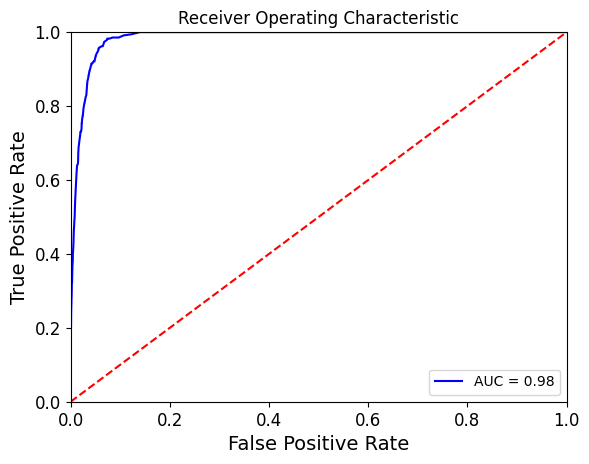

In [41]:
class_probabilities = rfc.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for our classifier is: {roc_auc}")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
# Erori -- comparam aici setul pe care s-a facut training cu setul pe care s-a testat
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Training Set Evaluation:")
print("RMSE:", train_rmse)
print()

print("Test Set Evaluation:")
print("RMSE:", test_rmse)

Training Set Evaluation:
RMSE: 0.010030387955074434

Test Set Evaluation:
RMSE: 0.1788584427364325


In [43]:
#Antrenam modelul cu datele cu primele 4 coloane
#Chiar si dupa scalarea datelor, am observat ca imi apar valori NaN sau valori infinite pe care a trebuit sa le indepartez
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


#Cautam valorile care sunt NaN sau sunt egale cu infinit
nan_mask = np.isnan(X_with_columns_train)
inf_mask = np.isinf(X_with_columns_train)

has_nan = np.any(nan_mask)
has_inf = np.any(inf_mask)

#am inlocuit valorile NaN si valorile egale cu infinit cu alte valori pe o anumita strategie ('mean')
if has_nan or has_inf: 
    imputer = SimpleImputer(strategy='mean')
    X_with_columns_train = imputer.fit_transform(X_with_columns_train)
    X_with_columns_train[inf_mask] = np.finfo(np.float32).max

nan_mask_test = np.isnan(X_with_columns_test)
inf_mask_test = np.isinf(X_with_columns_test)

has_nan_test = np.any(nan_mask_test)
has_inf_test = np.any(inf_mask_test)

if has_nan_test or has_inf_test:
    X_with_columns_test = imputer.transform(X_with_columns_test)
    X_with_columns_test[inf_mask_test] = np.finfo(np.float32).max

rfc2 = RandomForestClassifier(n_estimators=100, random_state=42)
rfc2.fit(X_with_columns_train, y_with_columns_train)

RandomForestClassifier(random_state=42)

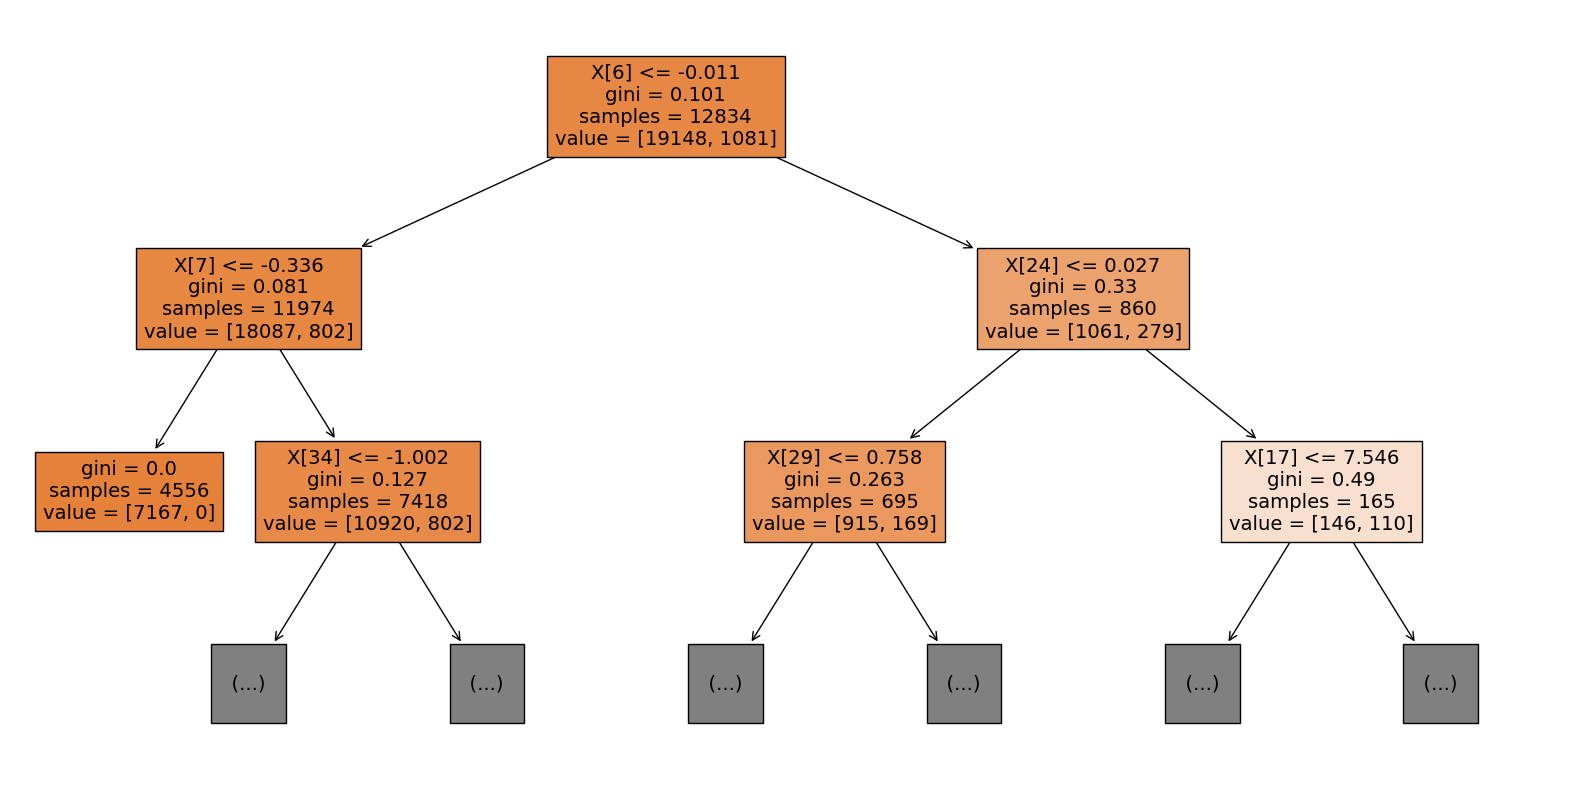

In [44]:
#Generam un DecisionTree -- se foloseste pentru a vedea ramificatile in decizii
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(rfc2.estimators_[0], max_depth = 2, filled=True)
plt.savefig('random_forest2.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

# Metrics - date cu primele 4 coloane

In [45]:
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve

y_with_columns_pred = rfc2.predict(X_with_columns_test)
y_with_columns_pred_train = rfc2.predict(X_with_columns_train)

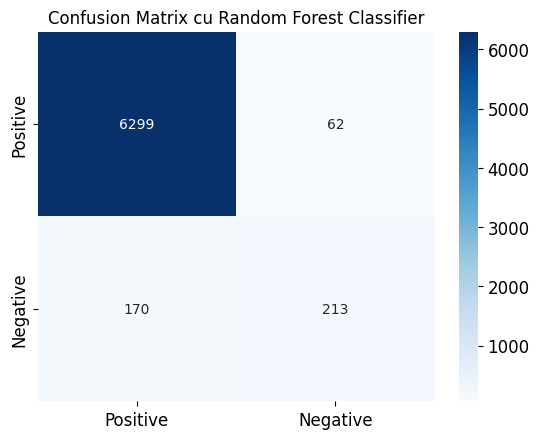

In [46]:
#Confusion_matrix 
import seaborn as sns

cm_rfc2 = confusion_matrix(y_with_columns_test, y_with_columns_pred)

labels = ['Positive', 'Negative']
sns.heatmap(cm_rfc2, annot=True,  fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix cu Random Forest Classifier")
plt.show()

In [47]:
accuracy_score(y_with_columns_test, y_with_columns_pred)

0.9655990510083037

In [48]:
precision_score(y_with_columns_test, y_with_columns_pred)

0.7745454545454545

In [49]:
recall_score(y_with_columns_test, y_with_columns_pred)

0.556135770234987

In [50]:
f1_score(y_with_columns_test, y_with_columns_pred)

0.6474164133738601

In [51]:
roc_auc_score(y_with_columns_test, y_with_columns_pred)

0.7731944375463569

AUC for our classifier is: 0.9825529920209763


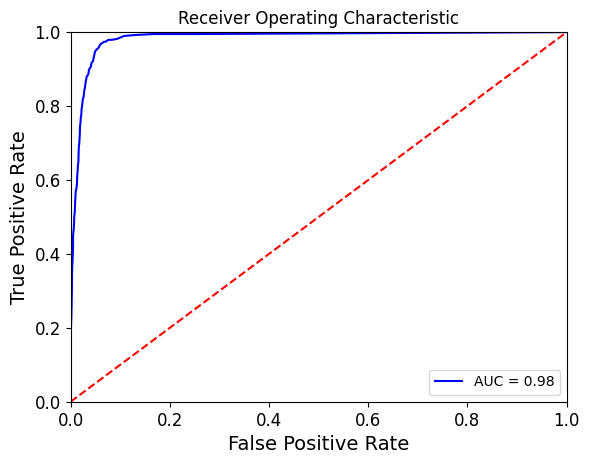

In [52]:
class_probabilities = rfc2.predict_proba(X_with_columns_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_with_columns_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for our classifier is: {roc_auc}")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
# Erori -- comparam aici setul pe care s-a facut training cu setul pe care s-a testat
train_rmse = mean_squared_error(y_with_columns_train, y_with_columns_pred_train, squared=False)
test_rmse = mean_squared_error(y_with_columns_test, y_with_columns_pred, squared=False)

print("Training Set Evaluation:")
print("RMSE:", train_rmse)
print()

print("Test Set Evaluation:")
print("RMSE:", test_rmse)

Training Set Evaluation:
RMSE: 0.0

Test Set Evaluation:
RMSE: 0.18547492820242936


# MLP CLASSIFIER

In [54]:
#Pentru acest clasificator s-au optinut valori mai bune 
#pentru f1_score si acuracy_score pentru setul de date cu primele 4 coloane ramase

#Set de date fara - f1_score = 63,71%, accuracy = 96,4%
#Set de date cu - f1_score = 64,26% , accuracy = 96,32%

In [55]:
from sklearn.neural_network import MLPClassifier

#Pentru parametrul activation = relu, alpha = 0.16, f1_score = 63,71%
#                                     alpha = 0.2, f1_score = 63,19%
#                                     alpha = 0.22, f1_score = 61,84%
#Pentru parametrul activation = identity, alpha = 0.16, f1_score = 39,17%
#                                         alpha = 0.2, f1_score = 39,5%
#                                         alpha = 0.22, f1_score = 39,83%
#Pentru parametrul activation = tanh, alpha = 0.16, f1_score = 63,47%
#                                     alpha = 0.2, f1_score = 62,59%
#                                     alpha = 0.22, f1_score = 61,48%

mlp = MLPClassifier(hidden_layer_sizes=(100, 100),activation='relu',solver='adam',learning_rate='invscaling', random_state=42, alpha = 0.16, max_iter=2000)
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.16, hidden_layer_sizes=(100, 100),
              learning_rate='invscaling', max_iter=2000, random_state=42)

# Metrics - cu date fara primele 4 coloane

In [56]:
y_pred = mlp.predict(X_test)
y_pred_train = mlp.predict(X_train)

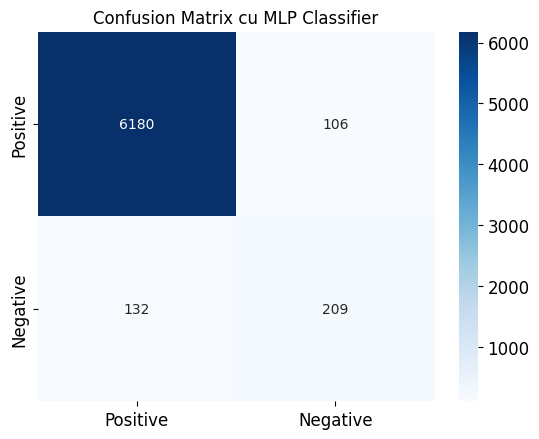

In [57]:
cm_mlp = confusion_matrix(y_test, y_pred)

labels = ['Positive', 'Negative']
sns.heatmap(cm_mlp, annot=True,  fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix cu MLP Classifier")
plt.show()

In [58]:
accuracy_score(y_test, y_pred)

0.9640863135657161

In [59]:
precision_score(y_test, y_pred)

0.6634920634920635

In [60]:
recall_score(y_test, y_pred)

0.6129032258064516

In [61]:
f1_score_MLP = f1_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.6371951219512195

In [62]:
roc_auc_score(y_test, y_pred)

0.7980201779684499

AUC for our classifier is: 0.9846397944321645


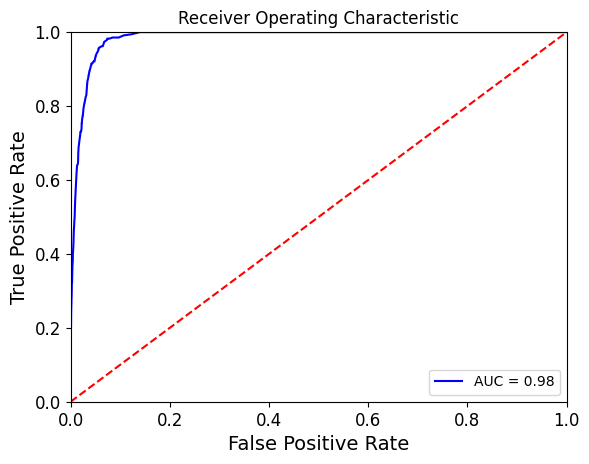

In [63]:
class_probabilities = rfc.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for our classifier is: {roc_auc}")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Training Set Evaluation:")
print("RMSE:", train_rmse)
print()

print("Test Set Evaluation:")
print("RMSE:", test_rmse)

Training Set Evaluation:
RMSE: 0.15603621750122998

Test Set Evaluation:
RMSE: 0.18950906689201968


In [65]:
#Antrenam modelul cu datele cu primele 4 coloane
#Chiar si dupa scalarea datelor, am observat ca imi apar valori NaN sau valori infinite pe care a trebuit sa le indepartez
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


#Cautam valorile care sunt NaN sau sunt egale cu infinit
nan_mask = np.isnan(X_with_columns_train)
inf_mask = np.isinf(X_with_columns_train)

has_nan = np.any(nan_mask)
has_inf = np.any(inf_mask)

#am inlocuit valorile NaN si valorile egale cu infinit cu alte valori pe o anumita strategie ('mean')
if has_nan or has_inf: 
    imputer = SimpleImputer(strategy='mean')
    X_with_columns_train = imputer.fit_transform(X_with_columns_train)
    X_with_columns_train[inf_mask] = np.finfo(np.float32).max

nan_mask_test = np.isnan(X_with_columns_test)
inf_mask_test = np.isinf(X_with_columns_test)

has_nan_test = np.any(nan_mask_test)
has_inf_test = np.any(inf_mask_test)

if has_nan_test or has_inf_test:
    X_with_columns_test = imputer.transform(X_with_columns_test)
    X_with_columns_test[inf_mask_test] = np.finfo(np.float32).max
    
#Am ales sa analizez datele cu primele 4 coloane pe clasificatorul dupa care am obtinut cea ma buna performanta la f1_score
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 100),activation='relu',solver='adam',learning_rate='invscaling', random_state=42, alpha = 0.16, max_iter=2000)
mlp2.fit(X_with_columns_train, y_with_columns_train)

MLPClassifier(alpha=0.16, hidden_layer_sizes=(100, 100),
              learning_rate='invscaling', max_iter=2000, random_state=42)

# Metrics - cu datele cu primele 4 coloane

In [66]:
y_with_columns_pred = mlp2.predict(X_with_columns_test)
y__with_columns_pred_train = mlp2.predict(X_with_columns_train)

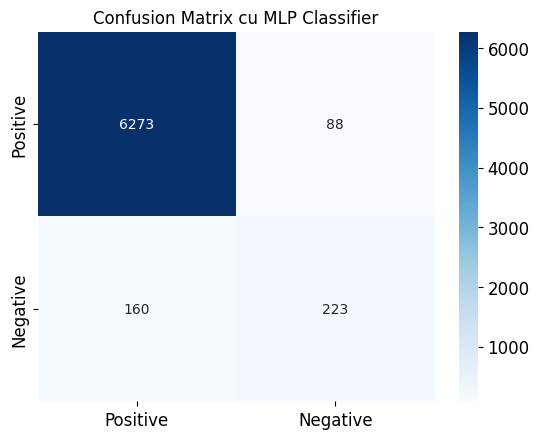

In [67]:
cm_mlp = confusion_matrix(y_with_columns_test, y_with_columns_pred)

labels = ['Positive', 'Negative']
sns.heatmap(cm_mlp, annot=True,  fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix cu MLP Classifier")
plt.show()

In [68]:
accuracy_score(y_with_columns_test, y_with_columns_pred)

0.963226571767497

In [69]:
precision_score(y_with_columns_test, y_with_columns_pred)

0.7170418006430869

In [70]:
recall_score(y_with_columns_test, y_with_columns_pred)

0.5822454308093995

In [71]:
f1_score(y_with_columns_test, y_with_columns_pred)

0.6426512968299712

In [72]:
roc_auc_score(y_with_columns_test, y_with_columns_pred)

0.7842055640134091

AUC for our classifier is: 0.9825529920209763


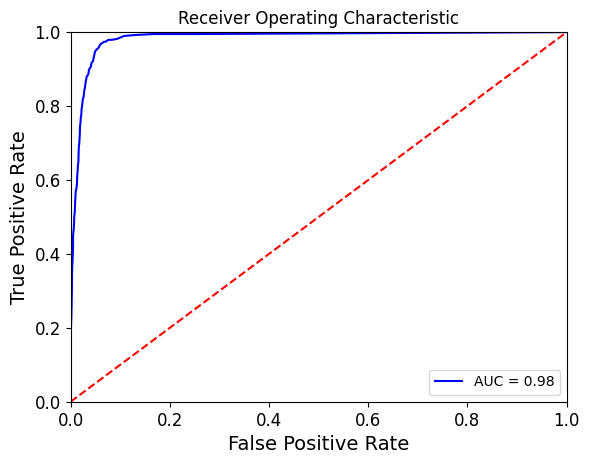

In [73]:
class_probabilities = rfc2.predict_proba(X_with_columns_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_with_columns_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for our classifier is: {roc_auc}")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
# Erori -- comparam aici setul pe care s-a facut training cu setul pe care s-a testat
train_rmse = mean_squared_error(y_with_columns_train, y_with_columns_pred_train, squared=False)
test_rmse = mean_squared_error(y_with_columns_test, y_with_columns_pred, squared=False)

print("Training Set Evaluation:")
print("RMSE:", train_rmse)
print()

print("Test Set Evaluation:")
print("RMSE:", test_rmse)

Training Set Evaluation:
RMSE: 0.0

Test Set Evaluation:
RMSE: 0.19176399096937613


# DECISION TREE CLASSIFIER

In [75]:
#Pentru acest clasificator s-au optinut valori mai bune 
#pentru f1_score si acuracy_score pentru setul de date cu primele 4 coloane ramase

#Set de date fara - f1_score = 62,56%, accuracy = 95,86%
#Set de date cu - f1_score = 64,36% , accuracy = 96,32%

In [76]:
#Antrenam modelul cu datele fara primele 4 coloane
from sklearn import tree

#Pentru criterion = "entropy", ht = 100, f1_score = 61,51%, accuracy = 95,78%
#Pentru criterion = "gini", ht = 100, f1_score = 62,56%, accuracy = 95,86%

ht = 100
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=ht)
clf.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=100)

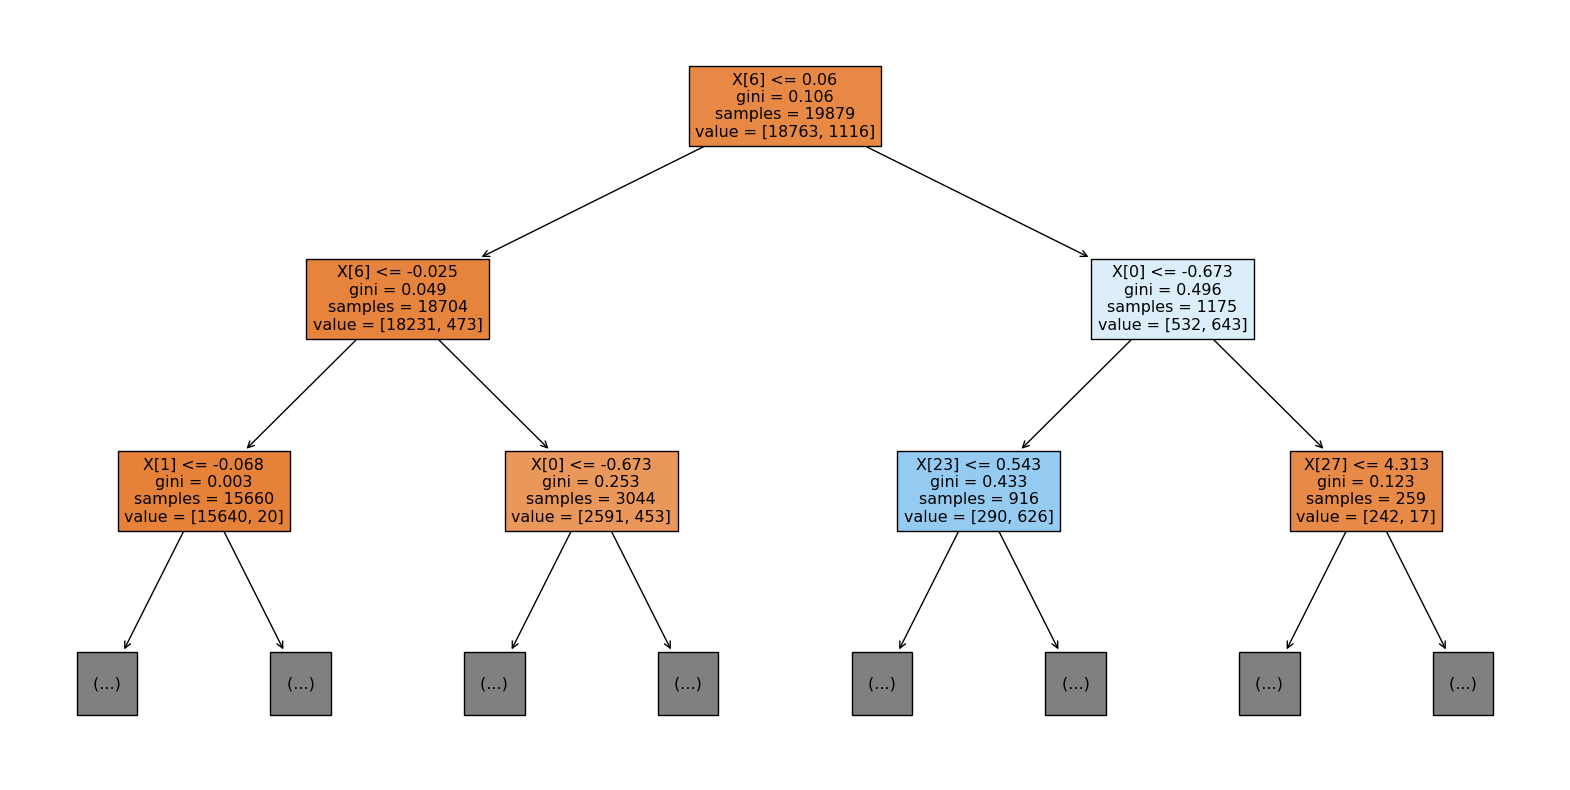

In [77]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf, max_depth = 2, filled=True)

fig.savefig("decistion_tree.pdf")

# Metrics - cu datele fara primele 4 coloane

In [78]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

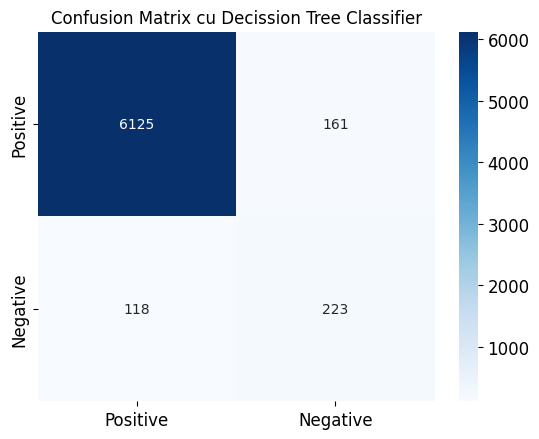

In [79]:
cm_clf = confusion_matrix(y_test, y_pred)

labels = ['Positive', 'Negative']
sns.heatmap(cm_clf, annot=True,  fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix cu Decission Tree Classifier")
plt.show()

In [80]:
accuracy_score(y_test, y_pred)

0.9578995020371208

In [81]:
precision_score(y_test, y_pred)

0.5807291666666666

In [82]:
recall_score(y_test, y_pred)

0.6539589442815249

In [83]:
f1_score_DTC = f1_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.6151724137931034

In [84]:
roc_auc_score(y_test, y_pred)

0.8141732360605842

AUC for our classifier is: 0.9846397944321645


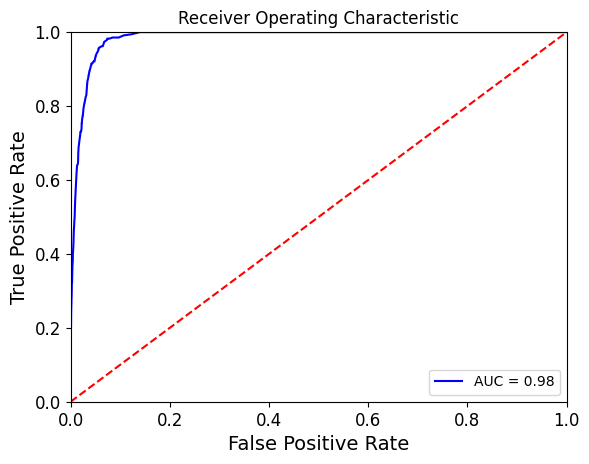

In [85]:
class_probabilities = rfc.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for our classifier is: {roc_auc}")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Training Set Evaluation:")
print("RMSE:", train_rmse)
print()

print("Test Set Evaluation:")
print("RMSE:", test_rmse)

Training Set Evaluation:
RMSE: 0.010030387955074434

Test Set Evaluation:
RMSE: 0.20518405874453097


In [87]:
#Antrenam modelul cu datele cu primele 4 coloane
#Chiar si dupa scalarea datelor, am observat ca imi apar valori NaN sau valori infinite pe care a trebuit sa le indepartez
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


#Cautam valorile care sunt NaN sau sunt egale cu infinit
nan_mask = np.isnan(X_with_columns_train)
inf_mask = np.isinf(X_with_columns_train)

has_nan = np.any(nan_mask)
has_inf = np.any(inf_mask)

#am inlocuit valorile NaN si valorile egale cu infinit cu alte valori pe o anumita strategie ('mean')
if has_nan or has_inf: 
    imputer = SimpleImputer(strategy='mean')
    X_with_columns_train = imputer.fit_transform(X_with_columns_train)
    X_with_columns_train[inf_mask] = np.finfo(np.float32).max

nan_mask_test = np.isnan(X_with_columns_test)
inf_mask_test = np.isinf(X_with_columns_test)

has_nan_test = np.any(nan_mask_test)
has_inf_test = np.any(inf_mask_test)

if has_nan_test or has_inf_test:
    X_with_columns_test = imputer.transform(X_with_columns_test)
    X_with_columns_test[inf_mask_test] = np.finfo(np.float32).max

ht = 100
clf2 = tree.DecisionTreeClassifier(criterion="gini", max_depth=ht)
clf2.fit(X_with_columns_train, y_with_columns_train) 

DecisionTreeClassifier(max_depth=100)

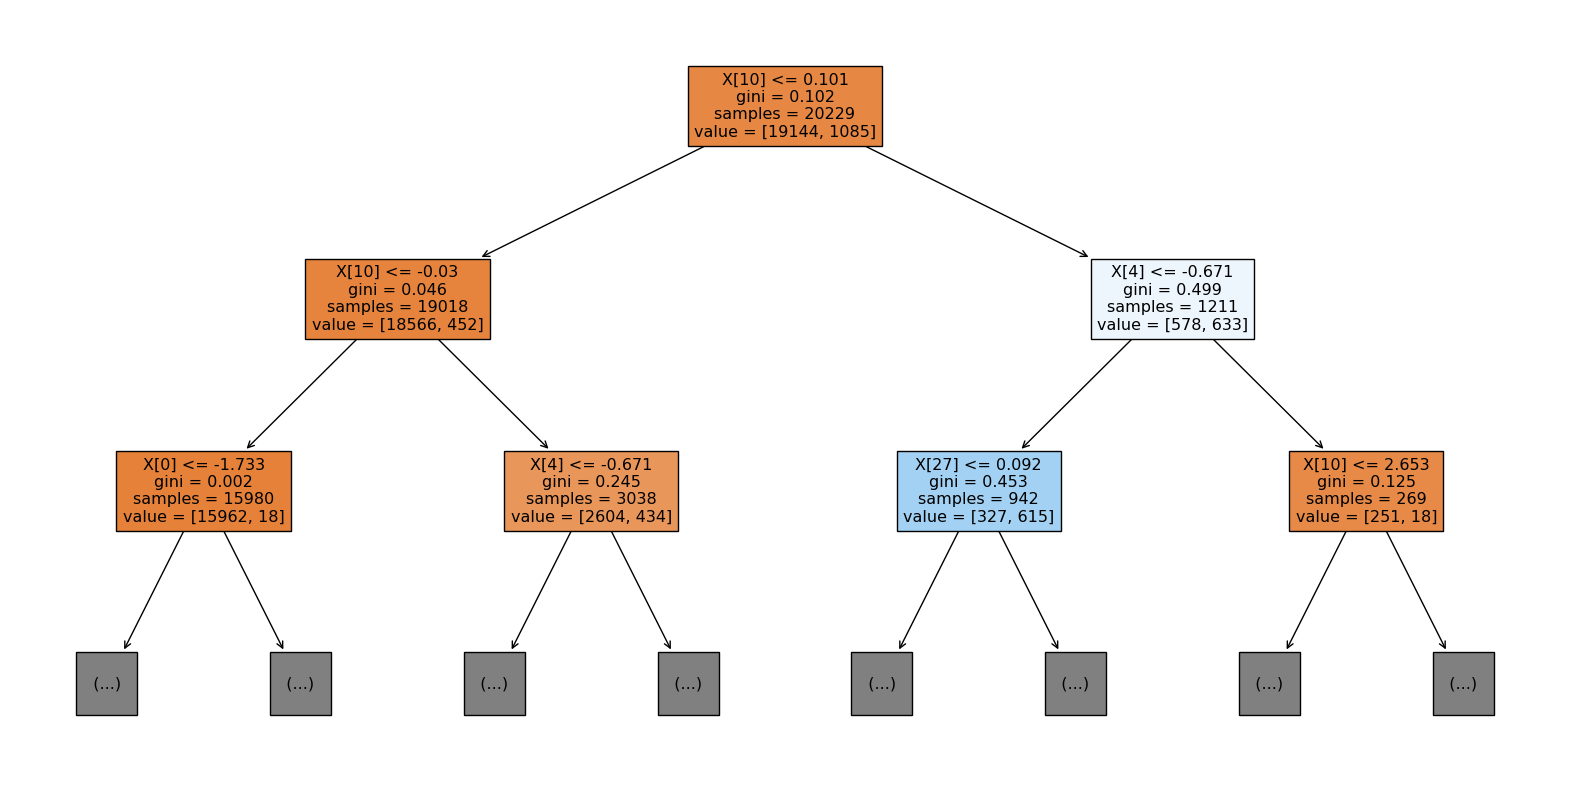

In [88]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf2, max_depth = 2, filled=True)

fig.savefig("decistion_tree2.pdf")

# Metrics - cu datele cu primele 4 coloane

In [89]:
y_with_columns_pred = mlp2.predict(X_with_columns_test)
y__with_columns_pred_train = mlp2.predict(X_with_columns_train)

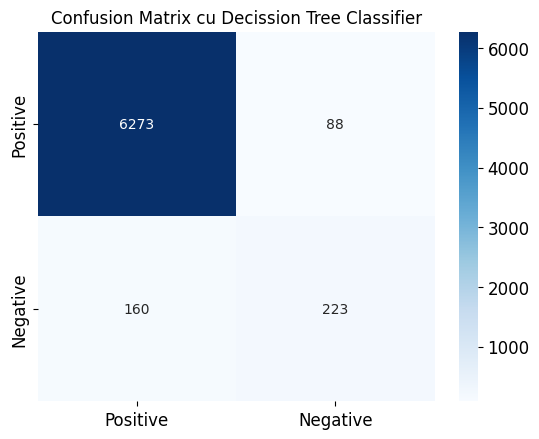

In [90]:
cm_clf = confusion_matrix(y_with_columns_test, y_with_columns_pred)

labels = ['Positive', 'Negative']
sns.heatmap(cm_mlp, annot=True,  fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix cu Decission Tree Classifier")
plt.show()

In [91]:
accuracy_score(y_with_columns_test, y_with_columns_pred)

0.963226571767497

In [92]:
precision_score(y_with_columns_test, y_with_columns_pred)

0.7170418006430869

In [93]:
recall_score(y_with_columns_test, y_with_columns_pred)

0.5822454308093995

In [94]:
f1_score(y_with_columns_test, y_with_columns_pred)

0.6426512968299712

In [95]:
roc_auc_score(y_with_columns_test, y_with_columns_pred)

0.7842055640134091

AUC for our classifier is: 0.9825529920209763


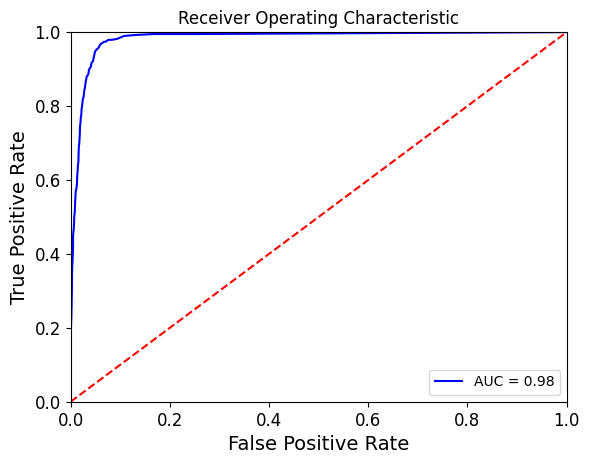

In [96]:
class_probabilities = rfc2.predict_proba(X_with_columns_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_with_columns_test, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for our classifier is: {roc_auc}")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [97]:
# Erori -- comparam aici setul pe care s-a facut training cu setul pe care s-a testat
train_rmse = mean_squared_error(y_with_columns_train, y_with_columns_pred_train, squared=False)
test_rmse = mean_squared_error(y_with_columns_test, y_with_columns_pred, squared=False)

print("Training Set Evaluation:")
print("RMSE:", train_rmse)
print()

print("Test Set Evaluation:")
print("RMSE:", test_rmse)

Training Set Evaluation:
RMSE: 0.0

Test Set Evaluation:
RMSE: 0.19176399096937613


# Concluzii

In [98]:
#Clasificatorul cu cele mai bune rezultate pentru setul de date avut la dispozitie este Random Forest Classifier

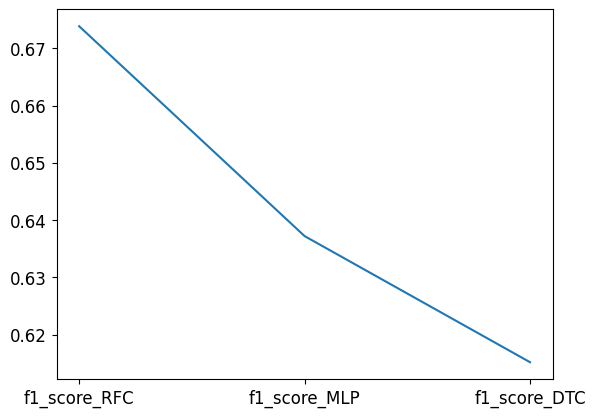

In [99]:
import matplotlib.pyplot as plt
import numpy as np

xaxis = np.array(["f1_score_RFC", "f1_score_MLP", "f1_score_DTC"])
yaxis = np.array([f1_score_RFC, f1_score_MLP, f1_score_DTC])

plt.plot(xaxis, yaxis)
plt.show()